<a href="https://colab.research.google.com/github/Ruthuvikas/Spotify-Clustering/blob/main/popular_spotify_songs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dataset

In [379]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [380]:
import numpy
import pandas
import matplotlib
import tqdm

!unzip -n /content/drive/MyDrive/spotify.zip
df = pandas.read_csv('high_popularity_spotify_data.csv')

Archive:  /content/drive/MyDrive/spotify.zip


In [381]:
df1 = pandas.read_csv('low_popularity_spotify_data.csv')

In [382]:

merged_df = pandas.concat([df, df1], ignore_index=True)
df = merged_df


In [383]:
df.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3.0,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0.0,6.0,251668.0,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4.0,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1.0,2.0,210373.0,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4.0,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1.0,1.0,166300.0,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4.0,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0.0,0.0,157280.0,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4.0,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0.0,0.0,169917.0,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


In [384]:
# prompt: list all columns

print(df.columns.tolist())


['energy', 'tempo', 'danceability', 'playlist_genre', 'loudness', 'liveness', 'valence', 'track_artist', 'time_signature', 'speechiness', 'track_popularity', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'instrumentalness', 'track_album_id', 'mode', 'key', 'duration_ms', 'acousticness', 'id', 'playlist_subgenre', 'type', 'playlist_id']


Check for NA values

In [385]:
# Check for NA values and identify columns with missing values
na_cols = df.columns[df.isna().any()].tolist()
print(f"Columns with NA values: {na_cols}")

Columns with NA values: ['energy', 'tempo', 'danceability', 'loudness', 'liveness', 'valence', 'time_signature', 'speechiness', 'track_href', 'uri', 'track_album_name', 'analysis_url', 'instrumentalness', 'mode', 'key', 'duration_ms', 'acousticness', 'id', 'type']


In [386]:
# Calculate total number of NA values in the dataset
total_na_values = df.isna().sum().sum()
print(f"Total number of NA values in the dataset: {total_na_values}")

Total number of NA values in the dataset: 19


In [387]:

# Fill NA values in numerical columns with the mean
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    if col in na_cols:
        df[col] = df[col].fillna(df[col].mean())

# Check for NA values again to confirm
na_cols = df.columns[df.isna().any()].tolist()
print(f"Columns with NA values after filling: {na_cols}")
total_na_values = df.isna().sum().sum()
print(f"Total number of NA values after filling: {total_na_values}")

Columns with NA values after filling: ['track_href', 'uri', 'track_album_name', 'analysis_url', 'id', 'type']
Total number of NA values after filling: 6


In [388]:
df = df.drop(['track_id', 'track_album_id', 'playlist_id', 'id', 'analysis_url', 'track_href', 'uri', 'track_album_release_date'], axis=1)

In [389]:
df

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,track_album_name,playlist_name,track_name,instrumentalness,mode,key,duration_ms,acousticness,playlist_subgenre,type
0,0.592,157.969,0.521,pop,-7.777,0.1220,0.535,"Lady Gaga, Bruno Mars",3.0,0.0304,...,Die With A Smile,Today's Top Hits,Die With A Smile,0.0000,0.0,6.0,251668.0,0.3080,mainstream,audio_features
1,0.507,104.978,0.747,pop,-10.171,0.1170,0.438,Billie Eilish,4.0,0.0358,...,HIT ME HARD AND SOFT,Today's Top Hits,BIRDS OF A FEATHER,0.0608,1.0,2.0,210373.0,0.2000,mainstream,audio_features
2,0.808,108.548,0.554,pop,-4.169,0.1590,0.372,Gracie Abrams,4.0,0.0368,...,The Secret of Us (Deluxe),Today's Top Hits,That’s So True,0.0000,1.0,1.0,166300.0,0.2140,mainstream,audio_features
3,0.910,112.966,0.670,pop,-4.070,0.3040,0.786,Sabrina Carpenter,4.0,0.0634,...,Short n' Sweet,Today's Top Hits,Taste,0.0000,0.0,0.0,157280.0,0.0939,mainstream,audio_features
4,0.783,149.027,0.777,pop,-4.477,0.3550,0.939,"ROSÉ, Bruno Mars",4.0,0.2600,...,APT.,Today's Top Hits,APT.,0.0000,0.0,0.0,169917.0,0.0283,mainstream,audio_features
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4826,0.424,75.466,0.352,indian,-8.009,0.2420,0.605,M. S. Subbulakshmi,1.0,0.0634,...,Bhaja Govindam - Vishnu Sahasranamam,Carnatic Classics,Bhaja Govindam,0.0000,1.0,10.0,661293.0,0.9650,classical,audio_features
4827,0.349,147.193,0.471,indian,-16.633,0.2860,0.358,Jayanthi Kumaresh,4.0,0.0656,...,Veenai Jayanthi Kumaresh,Carnatic Classics,Varnam,0.9450,1.0,8.0,394400.0,0.9750,classical,audio_features
4828,0.595,174.308,0.436,indian,-11.494,0.0939,0.870,"Nirmala Rajasekar, Raghavendra Rao, Tanjore K....",4.0,0.0671,...,Into the Raga,Carnatic Classics,"Sarasuda Varnam (Raga Saveri, Aadi Tala): Jaya...",0.8680,1.0,3.0,473440.0,0.8160,classical,audio_features
4829,0.591,174.760,0.489,indian,-10.843,0.0770,0.689,Ganesh & Kumaresh,1.0,0.0813,...,Thillanas: A Confluence Of Rhythm & Melody,Carnatic Classics,Raga Karnaranjani,0.9270,0.0,8.0,298987.0,0.9480,classical,audio_features


In [390]:
import re
def clean_artist_name(name):
    # Remove special characters except for spaces and commas
    cleaned_name = re.sub(r"[^a-zA-Z0-9 ,]", "", name)
    return cleaned_name

# Apply the cleaning function to the 'track_artist' column
df['track_artist'] = df['track_artist'].apply(clean_artist_name)

EDA : Analyse Data

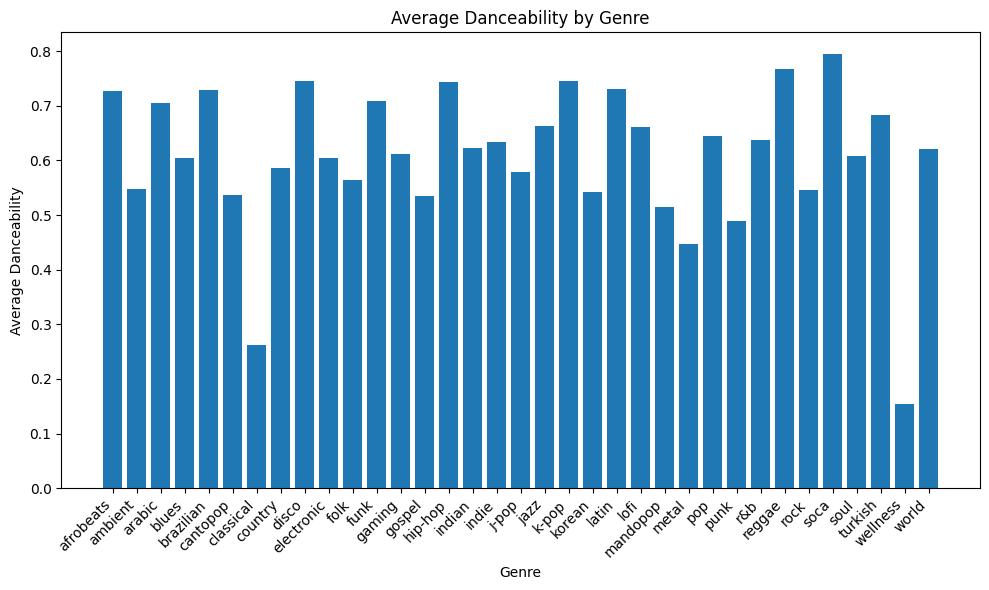

In [391]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame and it has columns 'track_artist', 'danceability', and 'genre'
genre_danceability = df.groupby('playlist_genre')['danceability'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(genre_danceability['playlist_genre'], genre_danceability['danceability'])
plt.xlabel('Genre')
plt.ylabel('Average Danceability')
plt.title('Average Danceability by Genre')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

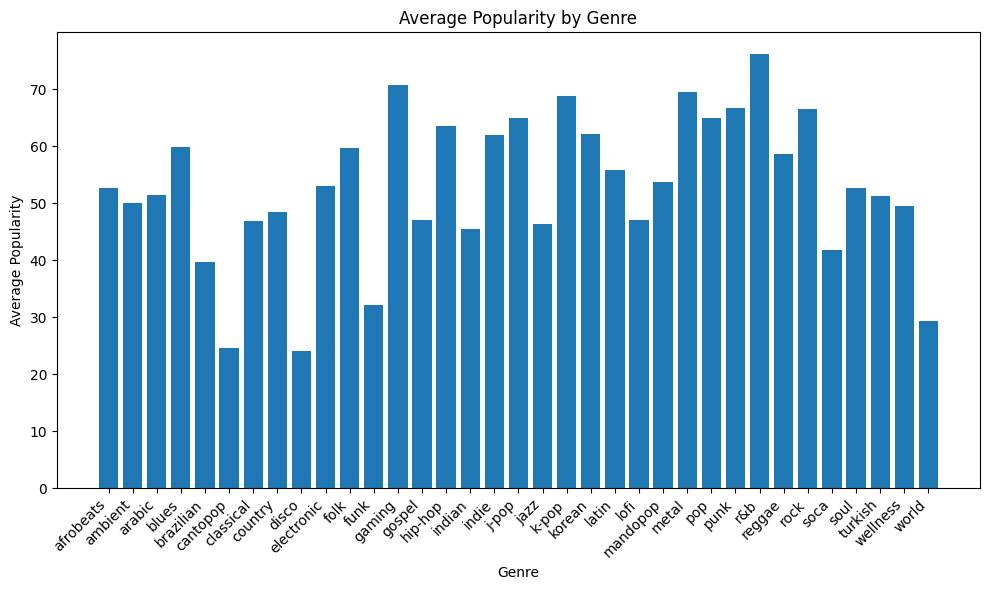

In [392]:
# prompt: plot playlist genre and avg popularity

genre_popularity = df.groupby('playlist_genre')['track_popularity'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(genre_popularity['playlist_genre'], genre_popularity['track_popularity'])
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 Artist

In [393]:
import pandas as pd

# Assuming 'df' is your DataFrame
top_10_artists = df.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False).head(10)

top_10_artists

,track_popularity
track_artist,
"Lady Gaga, Bruno Mars",100.0
"ROS, Bruno Mars",98.0
"Oscar Maydon, Fuerza Regida",93.0
Jimin,92.0
"The Weeknd, Playboi Carti",92.0
Chappell Roan,91.6
The Neighbourhood,90.0
"Tyler, The Creator, Kali Uchis",90.0
JENNIE,89.0


Top 10 Songs

In [394]:
# prompt: top 10 unique tracks

# Assuming 'df' is your DataFrame
top_10_tracks = df.groupby('track_name')['track_popularity'].mean().sort_values(ascending=False).head(10)

top_10_tracks

,track_popularity
track_name,
Die With A Smile,100.0
APT.,98.0
BIRDS OF A FEATHER,97.0
"Good Luck, Babe!",94.0
That’s So True,93.0
WILDFLOWER,93.0
Tu Boda,93.0
Si Antes Te Hubiera Conocido,93.0
Timeless (with Playboi Carti),92.0


In [395]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
artist_list = df['track_artist'].str.split(', ').tolist() # Split into lists of artists
artist_matrix = mlb.fit_transform(artist_list)

artist_df = pandas.DataFrame(artist_matrix, columns=mlb.classes_, index=df.index)
df = pandas.concat([df, artist_df], axis=1)

df = df.drop('track_artist', axis=1)

In [396]:
# prompt: label encode all the columns with strings

from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and it's already loaded as shown in the previous code.

for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column contains strings
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [397]:
df.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,time_signature,speechiness,track_popularity,...,wave to earth,werve,william,wnboss,xander,xxanteria,yatashigang,yellofish,yoranda,yuugen
0,0.592,157.969,0.521,25,-7.777,0.122,0.535,3.0,0.0304,100,...,0,0,0,0,0,0,0,0,0,0
1,0.507,104.978,0.747,25,-10.171,0.117,0.438,4.0,0.0358,97,...,0,0,0,0,0,0,0,0,0,0
2,0.808,108.548,0.554,25,-4.169,0.159,0.372,4.0,0.0368,93,...,0,0,0,0,0,0,0,0,0,0
3,0.910,112.966,0.670,25,-4.070,0.304,0.786,4.0,0.0634,81,...,0,0,0,0,0,0,0,0,0,0
4,0.783,149.027,0.777,25,-4.477,0.355,0.939,4.0,0.2600,98,...,0,0,0,0,0,0,0,0,0,0


In [398]:
df.shape

(4831, 4008)

PCA: reduce dim of high dim features

In [399]:
# prompt: apply standard scalar on the data and find best pca value for the dataset

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import numpy as np

# Assuming 'df' is your DataFrame and it's already preprocessed as in the previous code.

# Separate features (X) and target variable (y) if you have one.
# If not, use all columns as features:
X = df  # Replace with X = df.drop('target_column', axis=1) if applicable.

# Apply StandardScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Find the optimal number of components for PCA using explained variance ratio
pca = PCA()
pca.fit(X_scaled)

# Apply PCA with the optimal number of components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# X_pca now contains the reduced dimensionality data
print(f"Shape of data after PCA: {X_pca.shape}")

Shape of data after PCA: (4831, 3)


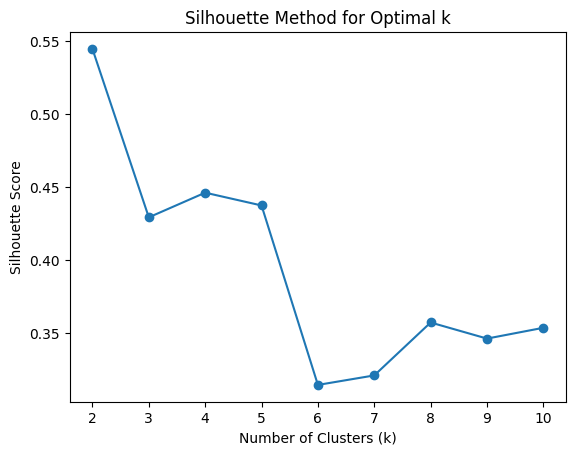

Optimal k (Silhouette Method): 2


In [400]:
# prompt: use elbow method to find optimal k for k-means

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different values of k
k_values = range(2, 11)  # Test k values from 2 to 10
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Use a fixed random_state for reproducibility
    kmeans.fit(X_pca)  # Fit the model to the PCA-transformed data
    labels = kmeans.labels_
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

# Find the optimal k based on the highest silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k (Silhouette Method): {optimal_k}")

In [401]:
# prompt: perform k means with k = 2

# Assuming 'X_pca' is your PCA-transformed data from the previous code.

kmeans = KMeans(n_clusters=2, random_state=42)  # Set k=2
kmeans.fit(X_pca)
labels = kmeans.labels_

# Now 'labels' contains the cluster assignments for each data point.
labels.shape

(4831,)

In [402]:
# prompt: combine df and pca df also append kmeans data label

# Create a new DataFrame from the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

print(pca_df.head())

# Concatenate the original DataFrame (df) and the PCA DataFrame (pca_df)
combined_df = pd.concat([df, pca_df], axis=1)

# Reset index of combined_df to match the labels array
combined_df = combined_df.reset_index(drop=True)  # Reset index and drop old index

# Add the k-means labels to the combined DataFrame
combined_df['kmeans_label'] = labels

# Now 'combined_df' contains the original data, PCA components, and k-means labels
combined_df.head()

        PC1       PC2       PC3
0 -0.818580 -1.518408  0.028722
1 -0.373980 -1.079724 -0.281202
2 -1.253885 -0.943108  0.224491
3 -1.844265  0.023035  1.312941
4 -2.523223  2.173532  0.867848


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,time_signature,speechiness,track_popularity,...,xander,xxanteria,yatashigang,yellofish,yoranda,yuugen,PC1,PC2,PC3,kmeans_label
0,0.592,157.969,0.521,25,-7.777,0.122,0.535,3.0,0.0304,100,...,0,0,0,0,0,0,-0.818580,-1.518408,0.028722,0
1,0.507,104.978,0.747,25,-10.171,0.117,0.438,4.0,0.0358,97,...,0,0,0,0,0,0,-0.373980,-1.079724,-0.281202,0
2,0.808,108.548,0.554,25,-4.169,0.159,0.372,4.0,0.0368,93,...,0,0,0,0,0,0,-1.253885,-0.943108,0.224491,0
3,0.910,112.966,0.670,25,-4.070,0.304,0.786,4.0,0.0634,81,...,0,0,0,0,0,0,-1.844265,0.023035,1.312941,0
4,0.783,149.027,0.777,25,-4.477,0.355,0.939,4.0,0.2600,98,...,0,0,0,0,0,0,-2.523223,2.173532,0.867848,0


In [403]:
combined_df.shape

(4831, 4012)

In [404]:
!pip install seaborn

In [405]:
import seaborn as sns

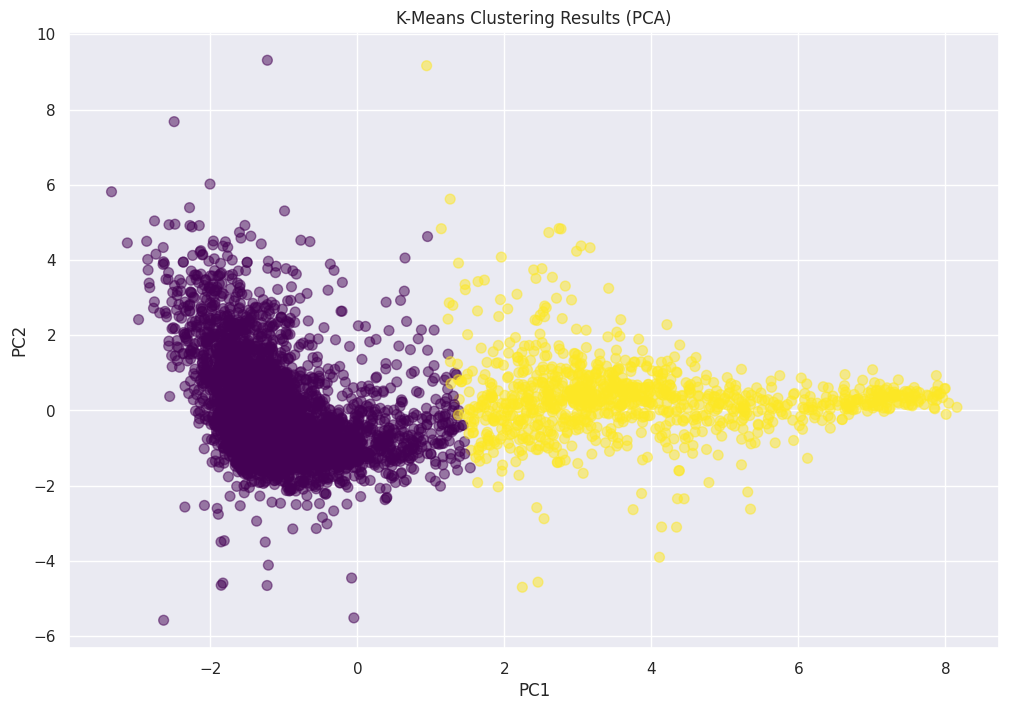

In [410]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()  # Set Seaborn style

plt.figure(figsize=(12, 8))
plt.scatter(combined_df['PC1'], combined_df['PC2'], c=combined_df['kmeans_label'], cmap='viridis', s=50, alpha=0.5)
plt.title('K-Means Clustering Results (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

In [407]:

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Create a DataFrame for the centroids
centroid_df = pd.DataFrame(data=centroids, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Concatenate original columns with centroids
# Inverse transform the centroids back to the original feature space
centroids_original_space = scaler.inverse_transform(pca.inverse_transform(centroids))

# Create a DataFrame for centroids in the original space
centroid_df_original = pd.DataFrame(centroids_original_space, columns=df.columns)

centroid_df_original

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,time_signature,speechiness,track_popularity,...,wave to earth,werve,william,wnboss,xander,xxanteria,yatashigang,yellofish,yoranda,yuugen
0,0.676646,120.626743,0.668411,16.743618,-6.343593,0.174388,0.547275,3.975821,0.111951,57.493879,...,0.000218,0.000286,0.000273,0.000274,0.000093,0.000162,0.000114,0.000048,0.000158,0.000243
1,0.256770,109.623031,0.453231,15.872681,-20.057255,0.142766,0.242267,3.792966,0.064284,44.738391,...,0.000165,-0.000083,-0.000037,-0.000039,0.000626,0.000372,0.000548,0.000791,0.000388,0.000077


In [408]:
df.describe()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,time_signature,speechiness,track_popularity,...,wave to earth,werve,william,wnboss,xander,xxanteria,yatashigang,yellofish,yoranda,yuugen
count,4831.000000,4831.000000,4831.000000,4831.000000,4831.000000,4831.000000,4831.00000,4831.000000,4831.000000,4831.000000,...,4831.000000,4831.000000,4831.000000,4831.000000,4831.000000,4831.000000,4831.000000,4831.000000,4831.000000,4831.000000
mean,0.586691,118.269293,0.622311,16.557028,-9.281627,0.167613,0.48193,3.936646,0.101738,54.761126,...,0.000207,0.000207,0.000207,0.000207,0.000207,0.000207,0.000207,0.000207,0.000207,0.000207
std,0.246237,28.509664,0.187686,10.189021,7.128658,0.124417,0.25801,0.409669,0.101021,19.828573,...,0.014387,0.014387,0.014387,0.014387,0.014387,0.014387,0.014387,0.014387,0.014387,0.014387
min,0.000202,48.232000,0.058900,0.000000,-48.069000,0.021000,0.02960,1.000000,0.021900,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.442500,96.063000,0.525000,9.000000,-10.297500,0.095400,0.27500,4.000000,0.038600,41.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.633000,118.068000,0.653000,18.000000,-7.191000,0.118000,0.48300,4.000000,0.056100,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.777000,136.715000,0.758000,25.000000,-5.337500,0.195000,0.69000,4.000000,0.118000,72.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.998000,241.426000,0.979000,34.000000,1.318000,0.979000,0.98700,5.000000,0.927000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
